# None-parametric bootstrap

## Libraries

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

## Functions

In [2]:
def plot_data(x, y):
    """
    Plots a dataset
    """
    plt.plot(x, y, "k.", markersize=15, markerfacecolor='white')
    plt.xlim([-0.1, 2.1])
    plt.xlabel('$x$', fontsize=14)
    plt.ylabel('$y$', fontsize=14)
    plt.show()

In [3]:
def plot_parameters(x, y):
    """
    Scaterplot of model parameters
    """
    plt.figure(figsize=(6, 6))

    main_ax = plt.subplot2grid((6, 6), (1, 0), colspan=5, rowspan=5)
    y_hist  = plt.subplot2grid((6, 6), (1, 5), colspan=1, rowspan=5, xticks=[], yticks=[])
    x_hist  = plt.subplot2grid((6, 6), (0, 0), colspan=5, rowspan=1, xticks=[], yticks=[])

    # scatter points on the main axes
    main_ax.plot(x, y, 'k.', markersize=3, alpha=0.1)
    main_ax.set_xlabel('$\hat{w}_o$', fontsize=20)
    main_ax.set_ylabel('$\hat{w}_1$', fontsize=20)
    main_ax.tick_params(axis='both', which='major', labelsize=14)

    # histogram on the attached axes
    x_hist.hist(x, 75, orientation='vertical', color='lightgray')
    y_hist.hist(y, 75, orientation='horizontal', color='lightgray')

    x_hist.spines["left"].set_visible(False)
    x_hist.spines["right"].set_visible(False)
    x_hist.spines["top"].set_visible(False)
    y_hist.spines["bottom"].set_visible(False)
    y_hist.spines["right"].set_visible(False)
    y_hist.spines["top"].set_visible(False)

    plt.tight_layout()
    plt.show()

## Reference process

We consider a process which follows the law $h(x) = w_o + w_1x$

In [4]:
def h(x):
    """
    Reference process
    """
    wo = -1.0
    w1 = +2.0
    return wo + w1*x

We generate data sets of $m$ points by adding Gaussian noise $\epsilon \sim \mathcal{N}(0,\sigma)$ to the model 

In [5]:
def generateData(m, sigma):
    """
    Generates a dataset (X, y) from reference process by adding Gaussian noise
    """
    X = np.random.rand(m, 1)*2.0
    y = h(X) + np.random.normal(0, sigma, size=(m, 1))
    return X, y

An example

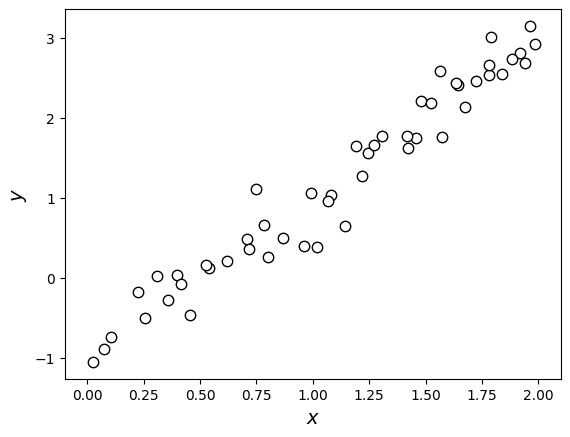

In [6]:
sigma = 0.25
m = 50
X, y = generateData(m, sigma)
plot_data(X, y)

## None-parametric bootstrap

None-parametric bootstrapping is used to generate several data sets from a given set by sampling the data set without replacement.

In [7]:
def bootstrap(X, y, n=len(X)):
    """
    Draws a sub set of size n from the orginal data set without replacement
    """
    X_gen = []
    y_gen = []
    for i in range(n):
        index = np.random.randint(0, len(X))
        X_gen.append(X[index])
        y_gen.append(y[index])
    return X_gen, y_gen 

It is then possible to use these generated data sets to train a model and study the variation of the model parameters.

In [8]:
K = 10000

w_o = []
w_1 = []
for k in range(K):
    # generate a training set
    x_gen, y_gen = bootstrap(X, y)
    reg = LinearRegression()
    reg.fit(x_gen, y_gen)
    w_o.append(reg.intercept_[0])
    w_1.append(reg.coef_[0][0])

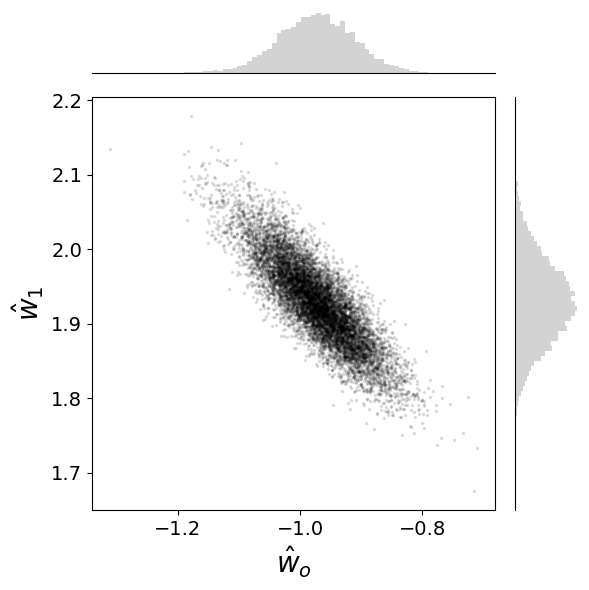

In [9]:
plot_parameters(w_o, w_1)

In [9]:
# Empirical covariance from bootstrapped population
W_gen = np.c_[w_o, w_1]
e = W_gen-np.mean(W_gen, axis=0)
e.T.dot(e)/len(e)

array([[ 0.00512314, -0.00317535],
       [-0.00317535,  0.00266821]])

We can compare this result with an ensemble generated from the "true" population

In [10]:
K = 10000

w_o = []
w_1 = []
for k in range(K):
    # generate a training set
    x_gen, y_gen = generateData(m, sigma)
    reg = LinearRegression()
    reg.fit(x_gen, y_gen)
    w_o.append(reg.intercept_[0])
    w_1.append(reg.coef_[0][0])

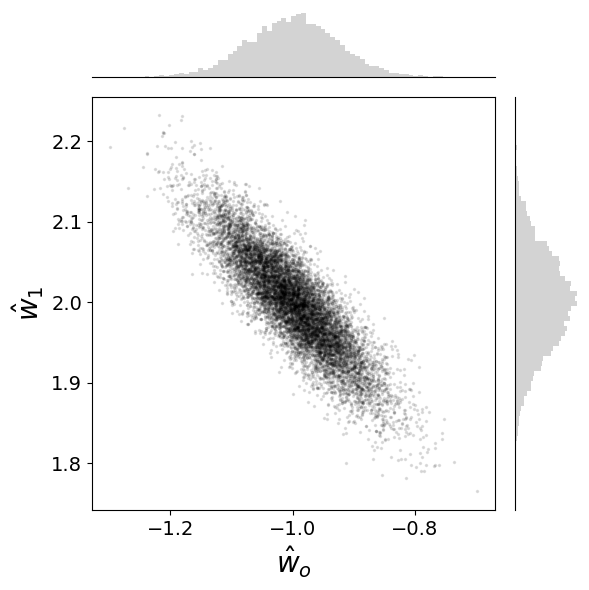

In [11]:
plot_parameters(w_o, w_1)

In [13]:
# Empirical covariance from "true" population
W_gen = np.c_[w_o, w_1]
e = W_gen-np.mean(W_gen, axis=0)
e.T.dot(e)/len(e)

array([[ 0.00520458, -0.00388562],
       [-0.00388562,  0.00387445]])

For the one familiar with the theory of statistical linear regression, you can compare these results with the one predicted by by the theory

In [14]:
# Covariance matrix estimator
X_b = np.c_[np.ones((m,1)), X]
A = X_b.T.dot(X_b)
np.linalg.inv(A)*sigma**2

array([[ 0.00483987, -0.00395488],
       [-0.00395488,  0.004357  ]])

## Suggested activities

* Repeat the calculations by changing the number of data sets drawn during bootstrapping. What do you observe when comparing with the results using the true population?
* Repeat the calculations by changing the number of points in the data sets drawn during bootstrapping. What do you observe when comparing with the results using the true population? Can you explain the effect you observe intuitively?